### Cell 1: Data Setup and Preprocessing
This cell defines the dictionaries with the updated statistics and calculates the manual Win Rates based on the distributions.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# ---------------------------------------------------------
# 1. Data Definitions
# ---------------------------------------------------------

# Standard Solvers (DFS, KB-HC, FullEntropy)
# Note: DFS and KB-HC distributions kept from original, Time/Mem updated.
# FullEntropy updated completely.
standard_solvers = {
    "DFS": {
        "total_time": 508.31,
        "peak_memory": 172.1,
        "distribution": {4: 530, 2: 21, 3: 185, 5: 676, 6: 521, 7: 238, 8: 99, 9: 23, 12: 2, 10: 9, 11: 4, 13: 1}
    },
    "KB Hill Climbing": {
        "total_time": 530.38,
        "peak_memory": 11.1,
        "distribution": {5: 794, 3: 212, 4: 679, 7: 140, 6: 383, 2: 18, 8: 49, 12: 2, 9: 23, 10: 6, 11: 3}
    },
    "FullEntropy": {
        "total_time": 861.38,
        "peak_memory": 109.3,
        "distribution": {2: 8, 3: 495, 4: 1404, 5: 379, 6: 23}
    }
}

# Progressive Entropy Tuning Data (Samples per node = 10, 30, 50, 80, 100)
# 'Hybrid' name removed, referred to as Progressive Entropy with tuning param 's'
progressive_tuning_data = {
    10: {
        "total_time": 219.17,
        "peak_memory": 171.1, # derived from image (Init 169.3 -> Peak 171.1)
        "distribution": {2: 2, 3: 260, 4: 1150, 5: 783, 6: 108, 7: 6}
    },
    30: {
        "total_time": 414.03,
        "peak_memory": 9.6, # derived from image
        "distribution": {2: 1, 3: 287, 4: 1206, 5: 746, 6: 65, 7: 4}
    },
    50: {
        "total_time": 527.59,
        "peak_memory": 9.7,
        "distribution": {2: 8, 3: 288, 4: 1238, 5: 701, 6: 72, 7: 2}
    },
    80: {
        "total_time": 711.87,
        "peak_memory": 9.6,
        "distribution": {2: 6, 3: 274, 4: 1321, 5: 650, 6: 55, 7: 3}
    },
    100: {
        "total_time": 860.66,
        "peak_memory": 9.6,
        "distribution": {2: 5, 3: 296, 4: 1284, 5: 668, 6: 54, 7: 2}
    }
}

# ---------------------------------------------------------
# 2. Helper Functions
# ---------------------------------------------------------

def calculate_stats(distribution):
    """Calculates Total Games, Win Rate (<=6), and Average Attempts."""
    total_games = sum(distribution.values())
    wins = sum(count for attempts, count in distribution.items() if attempts <= 6)
    
    win_rate = (wins / total_games) * 100 if total_games > 0 else 0
    
    weighted_sum = sum(attempts * count for attempts, count in distribution.items())
    avg_attempts = weighted_sum / total_games if total_games > 0 else 0
    
    return total_games, win_rate, avg_attempts

# ---------------------------------------------------------
# 3. Compile DataFrames
# ---------------------------------------------------------

# DataFrame 1: Main Comparison (DFS, KBHC, FullEntropy, Progressive s=50 as rep)
main_rows = []
for name, data in standard_solvers.items():
    games, win_rate, avg_att = calculate_stats(data['distribution'])
    main_rows.append({
        "Solver": name,
        "Total Time (s)": data['total_time'],
        "Peak Memory (MB)": data['peak_memory'],
        "Win Rate (%)": win_rate,
        "Avg Attempts": avg_att
    })

# Add a representative Progressive solver (Median parameter s=50)
prog_rep_data = progressive_tuning_data[50]
games, win_rate, avg_att = calculate_stats(prog_rep_data['distribution'])
main_rows.append({
    "Solver": "ProgEntropy (s=50)",
    "Total Time (s)": prog_rep_data['total_time'],
    "Peak Memory (MB)": prog_rep_data['peak_memory'],
    "Win Rate (%)": win_rate,
    "Avg Attempts": avg_att
})

df_main = pd.DataFrame(main_rows)

# DataFrame 2: Progressive Tuning Analysis
tuning_rows = []
for s, data in progressive_tuning_data.items():
    games, win_rate, avg_att = calculate_stats(data['distribution'])
    tuning_rows.append({
        "Samples (s)": s,
        "Total Time (s)": data['total_time'],
        "Avg Attempts": avg_att,
        "Win Rate (%)": win_rate,
        "Memory (MB)": data['peak_memory']
    })

df_tuning = pd.DataFrame(tuning_rows)

print("Main Comparison Data:")
print(df_main)
print("\nProgressive Tuning Data:")
print(df_tuning)

Main Comparison Data:
               Solver  Total Time (s)  Peak Memory (MB)  Win Rate (%)  \
0                 DFS          508.31             172.1     83.715894   
1    KB Hill Climbing          530.38              11.1     90.342139   
2         FullEntropy          861.38             109.3    100.000000   
3  ProgEntropy (s=50)          527.59               9.7     99.913382   

   Avg Attempts  
0      5.222607  
1      4.916414  
2      3.962754  
3      4.236899  

Progressive Tuning Data:
   Samples (s)  Total Time (s)  Avg Attempts  Win Rate (%)  Memory (MB)
0           10          219.17      4.326115     99.740147        171.1
1           30          414.03      4.259420     99.826765          9.6
2           50          527.59      4.236899     99.913382          9.7
3           80          711.87      4.209181     99.870074          9.6
4          100          860.66      4.206150     99.913382          9.6


### Cell 2: General Performance Comparison (Time & Memory)
This compares DFS, KB-HC, FullEntropy, and a representative Progressive Entropy (s=50).

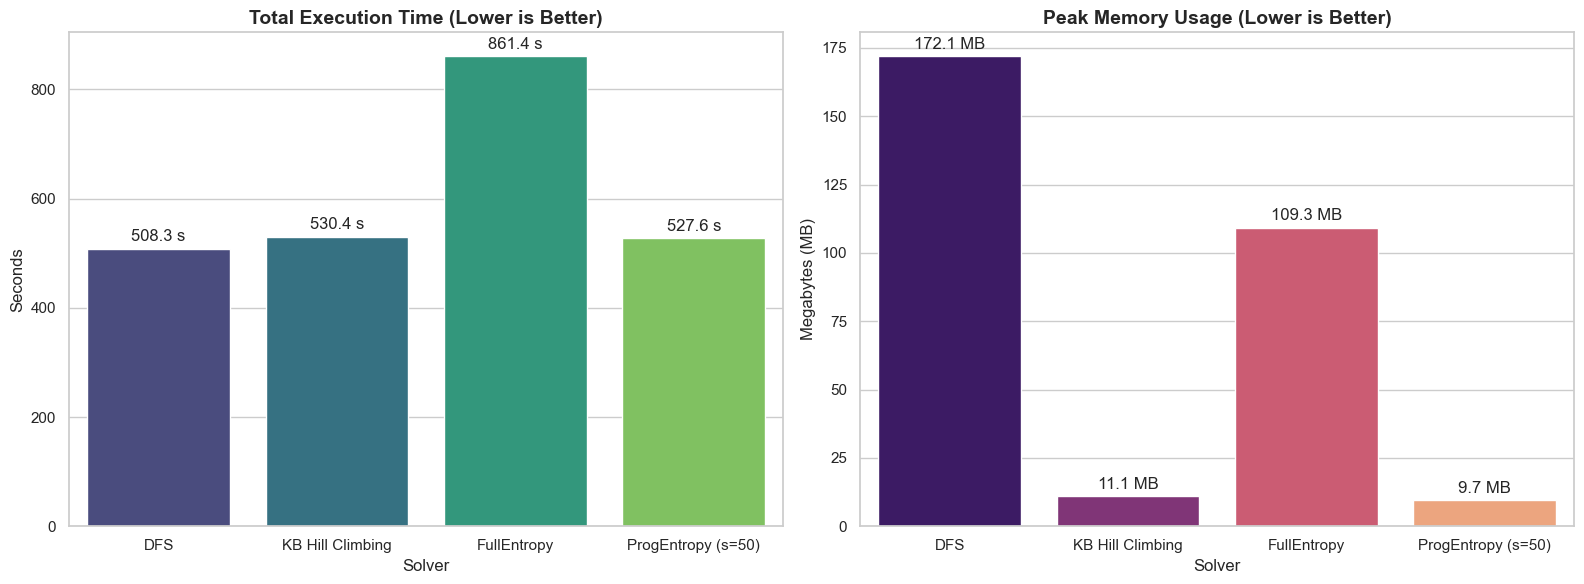

In [7]:
# Set up the plotting style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total Execution Time
# Note: hue="Solver" prevents the future warning and legend=False hides the redundant legend
sns.barplot(data=df_main, x="Solver", y="Total Time (s)", hue="Solver", ax=axes[0], palette="viridis", legend=False)
axes[0].set_title("Total Execution Time (Lower is Better)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Seconds")

# Loop through ALL containers to label every bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f s', padding=3)

# Plot 2: Peak Memory Usage
sns.barplot(data=df_main, x="Solver", y="Peak Memory (MB)", hue="Solver", ax=axes[1], palette="magma", legend=False)
axes[1].set_title("Peak Memory Usage (Lower is Better)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Megabytes (MB)")

# Loop through ALL containers to label every bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f MB', padding=3)

plt.tight_layout()
plt.savefig("general_performance_comparison.png")
plt.show()

### Cell 3: Progressive Entropy Tuning Analysis (Trade-off)
This creates a dual-axis chart showing how increasing the sample size (s) improves accuracy (guesses) but drastically increases runtime.

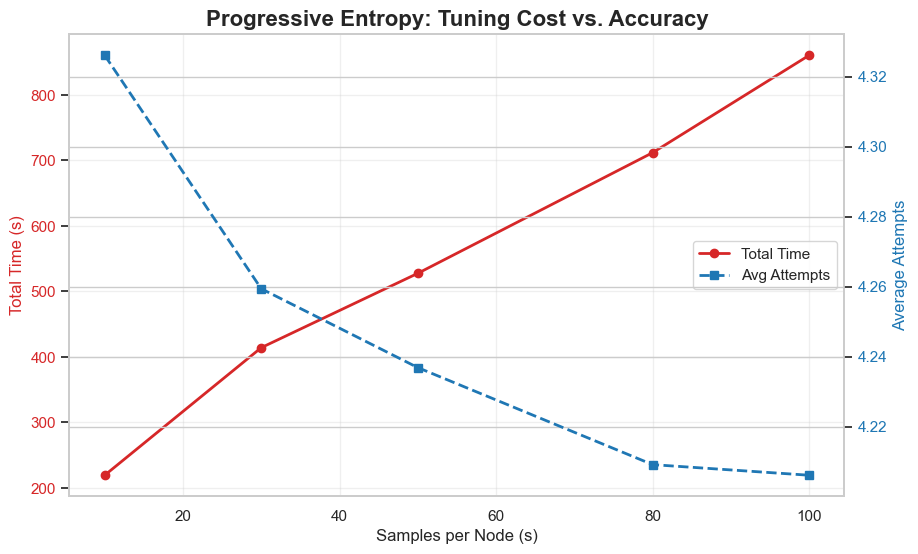

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Samples per Node (s)', fontsize=12)
ax1.set_ylabel('Total Time (s)', color=color, fontsize=12)
line1 = ax1.plot(df_tuning["Samples (s)"], df_tuning["Total Time (s)"], color=color, marker='o', label='Total Time', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Attempts', color=color, fontsize=12)
line2 = ax2.plot(df_tuning["Samples (s)"], df_tuning["Avg Attempts"], color=color, marker='s', linestyle='--', label='Avg Attempts', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right')

plt.title("Progressive Entropy: Tuning Cost vs. Accuracy", fontsize=16, fontweight='bold')
plt.savefig("progressive_tuning_tradeoff.png")
plt.show()

### Cell 4: Distribution of Guesses (Progressive Tuning)
This creates a stacked bar chart to see how the distribution of 3, 4, 5, 6+ guesses changes as you increase s.

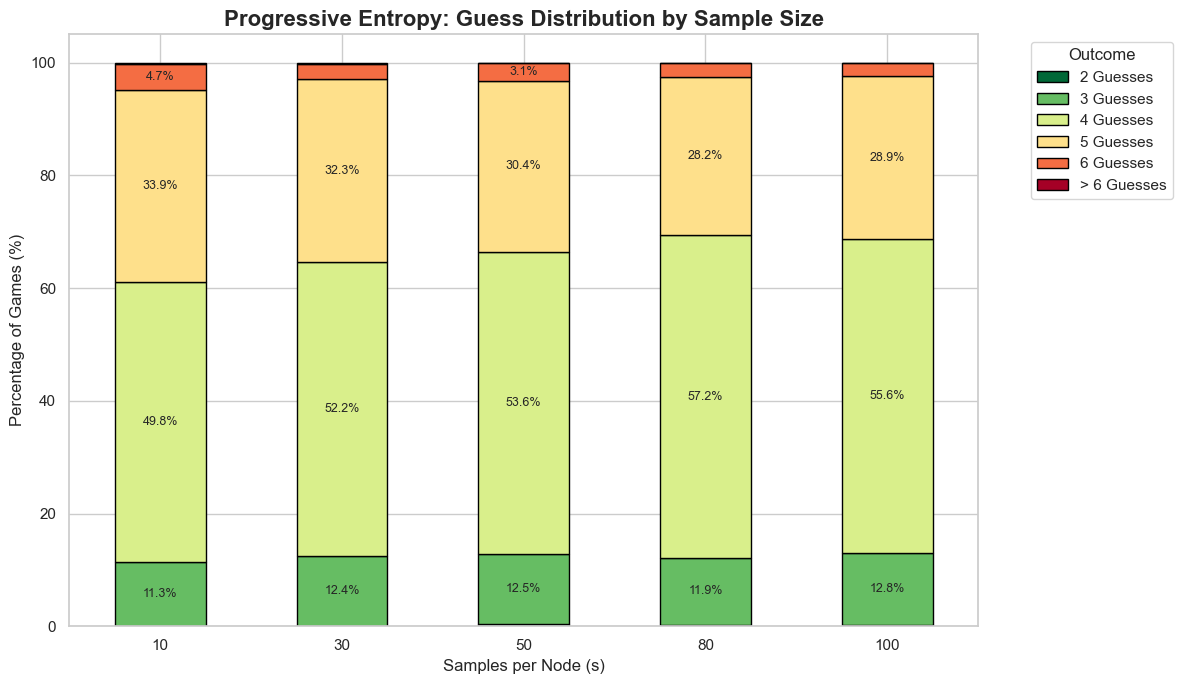

In [5]:
# Prepare distribution dataframe for plotting
dist_list = []
for s, data in progressive_tuning_data.items():
    d = data['distribution']
    # Normalize to get percentages
    total = sum(d.values())
    for k, v in d.items():
        # Group anything > 6 into "Fail (>6)" though strictly 7 is a fail in Wordle
        category = f"{k} Guesses" if k <= 6 else "> 6 Guesses"
        dist_list.append({"Samples": s, "Category": category, "Count": v, "Percentage": (v/total)*100})

df_dist = pd.DataFrame(dist_list)

# Pivot for stacked bar chart
df_pivot = df_dist.pivot(index="Samples", columns="Category", values="Percentage").fillna(0)

# Reorder columns logically
cols = [c for c in df_pivot.columns if c != "> 6 Guesses"]
cols.sort()
if "> 6 Guesses" in df_pivot.columns:
    cols.append("> 6 Guesses")
df_pivot = df_pivot[cols]

# Plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='RdYlGn_r', edgecolor='black')

plt.title("Progressive Entropy: Guess Distribution by Sample Size", fontsize=16, fontweight='bold')
plt.ylabel("Percentage of Games (%)", fontsize=12)
plt.xlabel("Samples per Node (s)", fontsize=12)
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Add value labels
for c in ax.containers:
    # Optional: Filter out small labels to avoid clutter
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 3 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9)

plt.tight_layout()
plt.savefig("progressive_distribution_tuning.png")
plt.show()

### 5. Histograms

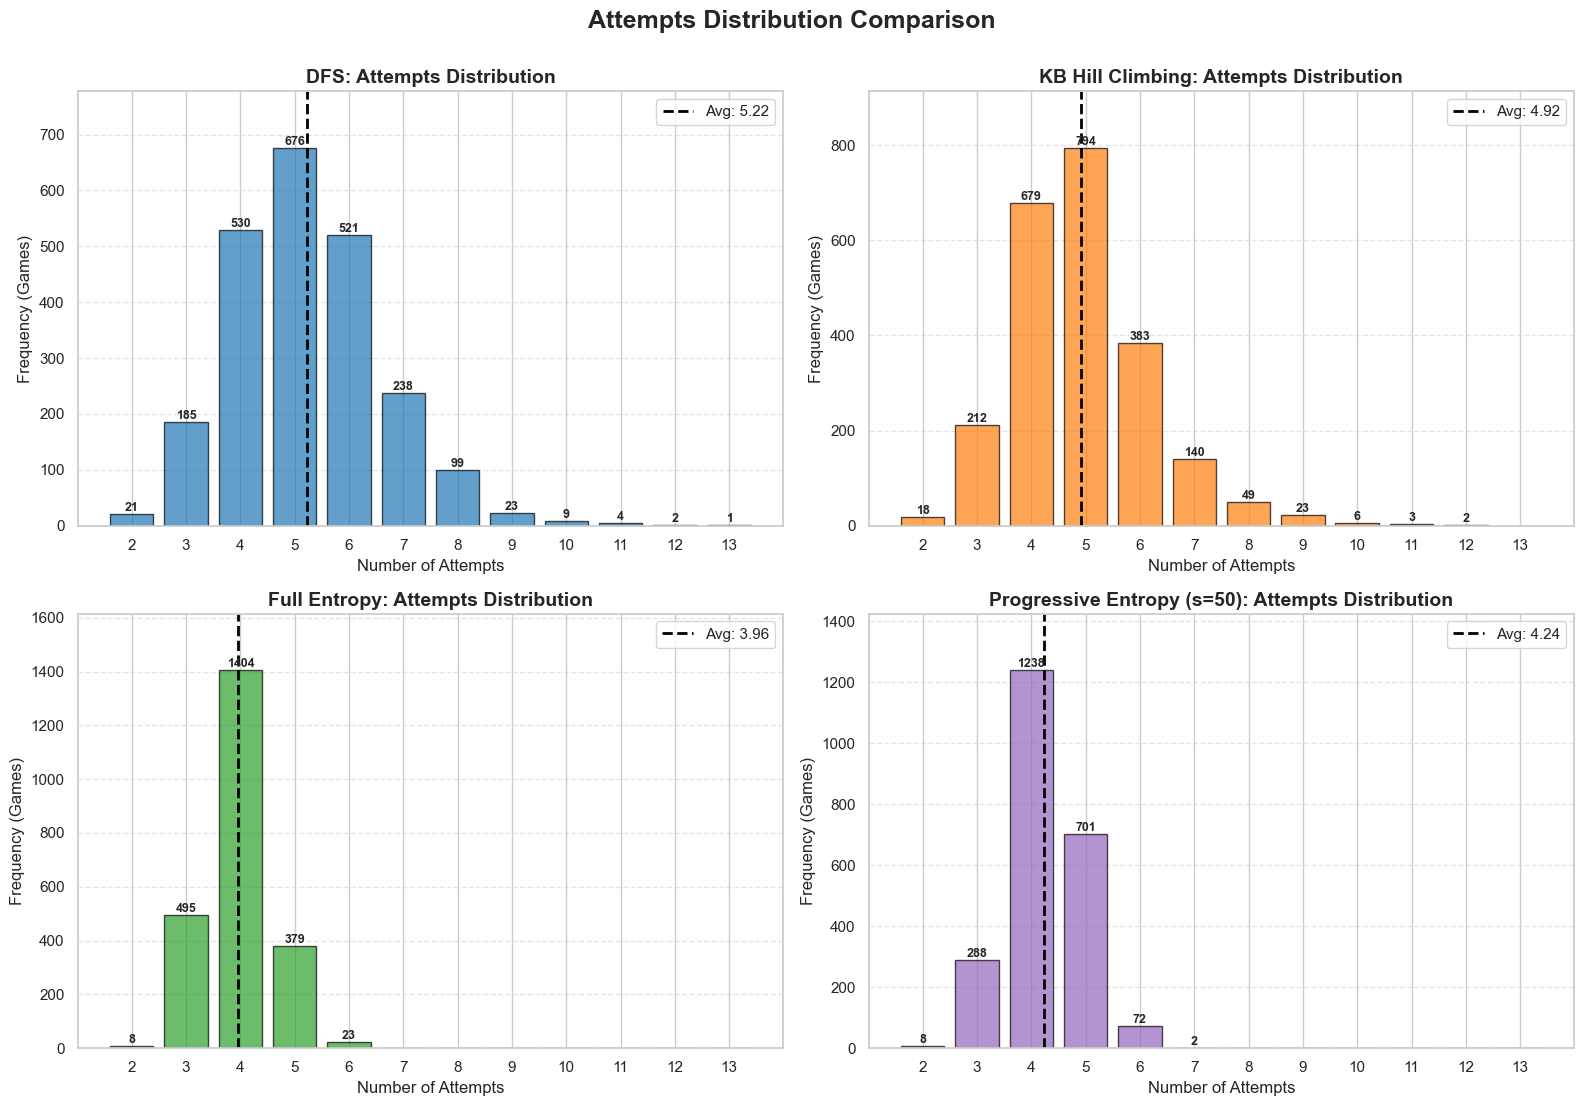

In [6]:
# 5. Generate Distribution Histograms (2x2 Grid)
# ---------------------------------------------------------

# Select data for plotting
plot_solvers = {
    "DFS": standard_solvers['DFS']['distribution'],
    "KB Hill Climbing": standard_solvers['KB Hill Climbing']['distribution'],
    "Full Entropy": standard_solvers['FullEntropy']['distribution'],
    "Progressive Entropy (s=50)": progressive_tuning_data[50]['distribution']
}

# Define chart settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd'] # Blue, Orange, Green, Purple
titles = list(plot_solvers.keys())
data_list = list(plot_solvers.values())

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Attempts Distribution Comparison', fontsize=18, fontweight='bold', y=0.95)

# Determine global x-axis range for consistent comparison
all_keys = [k for d in data_list for k in d.keys()]
min_attempt = min(all_keys)
max_attempt = max(all_keys)
# Add a little buffer to x-axis
x_range = range(min_attempt, max_attempt + 1)

for i, ax in enumerate(axes.flatten()):
    solver_name = titles[i]
    distribution = data_list[i]
    
    # Prepare x and y data, filling missing keys with 0
    x_vals = list(x_range)
    y_vals = [distribution.get(k, 0) for k in x_vals]
    
    # Calculate Average
    total_games = sum(distribution.values())
    weighted_sum = sum(k * v for k, v in distribution.items())
    avg = weighted_sum / total_games if total_games > 0 else 0
    
    # Bar Chart
    bars = ax.bar(x_vals, y_vals, color=colors[i], alpha=0.7, edgecolor='black', width=0.8)
    
    # Vertical Average Line
    ax.axvline(avg, color='black', linestyle='--', linewidth=2, label=f'Avg: {avg:.2f}')
    
    # Styling
    ax.set_title(f"{solver_name}: Attempts Distribution", fontsize=14, fontweight='bold')
    ax.set_xlabel("Number of Attempts")
    ax.set_ylabel("Frequency (Games)")
    ax.set_xticks(x_vals)
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend(loc='upper right')
    
    # Annotate bars with counts
    max_y = max(y_vals)
    ax.set_ylim(0, max_y * 1.15) # Add headroom for labels
    
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
plt.savefig("solver_distributions_grid.png")
plt.show()